# **Statistics For CS**


**Team Members:**

* Gangineni Aravind (21bcs039),
* Makam Sujith (21BCS061),
* Manepalli R V Sreeraaj (21BCS064)


**We have Considered Various Places In World:**

In [10]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from scipy.stats import chi2_contingency


We have conduct the following Non-Parametric Tests :


1.   Goodness of Fit
2.   Testing 2 variables for Independence
3.   Testing Proportions for Homogeneity using Chi-Square method
4.   2x2 Contingency Table
5.   Yates Correction Procedure

---------------------------
# **1. Goodness of Fit**

This Python code analyzes the association between countries and their capitals using a chi-square test. It loads data from the Dataset, creates a contingency table, performs the test, and prints the results, determining if the distribution is a good fit based on a 0.05 significance level.

Ho: It is a good fit

H1: It is not a good fit

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as ss

def goodness_of_fit(observed, expected):
    chi_square_cal = np.sum((observed - expected) ** 2 / expected)
    return chi_square_cal

# Read data from CSV file
data = pd.read_csv('world-data-2023-1.csv')

# Random sample of size n
sample_size = 40  # Adjust this based on your dataset size
alpha = 0.05

# Sample data
sample1 = data['Birth Rate']

# Observed value of count of jobs in the sample
observed_counts = np.unique(sample1, return_counts=True)[1]

print("Observed values:", observed_counts)

# Define a theoretical distribution for comparison (you need to adjust this based on your data)
# For example, you can use a uniform distribution for simplicity
theoretical_distribution = np.ones_like(observed_counts) * sample_size / len(observed_counts)

# Chi square calculated
chi_square_cal = goodness_of_fit(observed_counts, theoretical_distribution)
print("Expected values:", theoretical_distribution)
print("Chi square cal:", chi_square_cal)

# Degrees of freedom
df = len(observed_counts) - 1
print("degrees of freedom :",df)
# Chi square tabulated
chi_square_tab = ss.chi2.ppf(1 - alpha, df)
print("Chi square tab:", chi_square_tab)

if chi_square_cal <= chi_square_tab:
    print('Accept H0')
else:
    print('Reject H0')

Observed values: [1 1 1 1 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1]
Expected values: [0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051 0.51282051
 0

---------------------------
# **2. Test for Independence**


This Python code conducts a Chi-Square Test of Independence to assess the relationship between the 'Total agricultural land ' and 'total land area' variables from the dataset. It prints the Chi-Square Statistic, helping determine if the variables are independent based on a 0.05 significance level.

Null Hypothesis (H0): The total land area and agricultural land area are independent of each other.

Alternative Hypothesis (H1): The and total land area agricultural land area are dependent on each other.

The observed values:
[[65 31 47 17 47]
 [28 44 55 49 49]
 [47 21 34 27 44]
 [29 64 20 41 36]
 [54 26 48 57 20]]


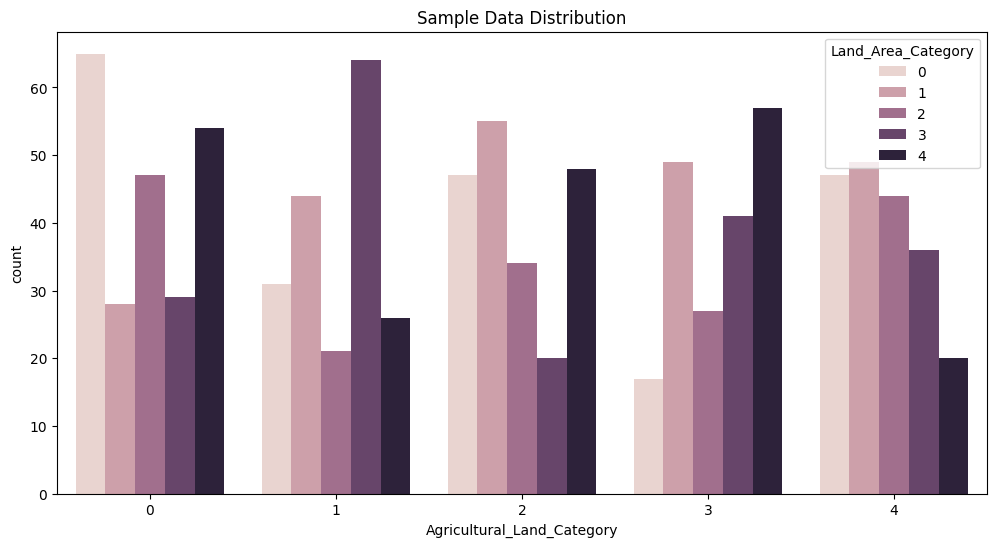

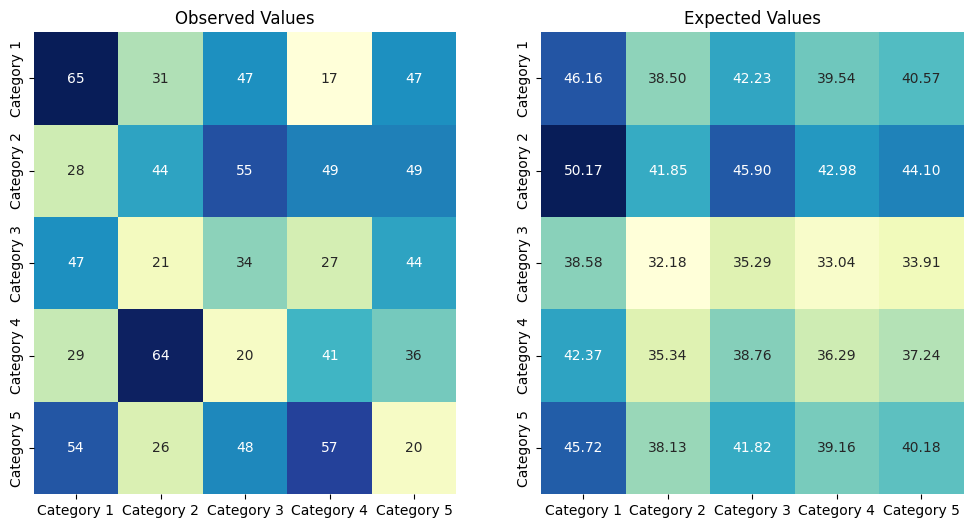

Chi square cal: 108.27163716923602
Chi square tab: 26.29622760486423
Reject H0: Variables are dependent. Degrees of freedom: 16


In [12]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

def independence_test(observed, m, n, total):
    # Calculate expected values
    expected = np.outer(np.sum(observed, axis=1), np.sum(observed, axis=0)) / total

    # Visualization: Heatmap of observed and expected values
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(observed, annot=True, fmt="d", cmap="YlGnBu", cbar=False,
                xticklabels=[f'Category {i}' for i in range(1, n + 1)],
                yticklabels=[f'Category {i}' for i in range(1, m + 1)])
    plt.title('Observed Values')

    plt.subplot(1, 2, 2)
    sns.heatmap(expected, annot=True, fmt=".2f", cmap="YlGnBu", cbar=False,
                xticklabels=[f'Category {i}' for i in range(1, n + 1)],
                yticklabels=[f'Category {i}' for i in range(1, m + 1)])
    plt.title('Expected Values')

    plt.show()

    # Chi-squared statistic calculation
    chi_square_cal = np.sum((observed - expected)**2 / expected)
    return chi_square_cal

# Read data from CSV file (adjust the path)
data = pd.read_csv('world-data-2023-1.csv')  # Update with your dataset filename

# Assuming 'Agricultural Land( %)' and 'Land Area(Km2)' are relevant columns
n = 5  # Number of categories for 'Agricultural Land( %)'
m = 5  # Number of categories for 'Land Area(Km2)'

df = (m - 1) * (n - 1)

# Convert 'Agricultural Land( %)' to numeric
data['Agricultural Land( %)'] = pd.to_numeric(data['Agricultural Land( %)'].str.rstrip('%'), errors='coerce') / 100

# Convert 'Land Area(Km2)' to numeric, handling commas
data['Land Area(Km2)'] = pd.to_numeric(data['Land Area(Km2)'].str.replace(',', ''), errors='coerce')

# Create categorical variables based on continuous columns
data['Agricultural_Land_Category'] = pd.qcut(data['Agricultural Land( %)'].dropna(), q=5, labels=False)
data['Land_Area_Category'] = pd.qcut(data['Land Area(Km2)'].dropna(), q=5, labels=False)

# Sample data based on categories
sample_size = 1000
sample2 = data.sample(n=sample_size, replace=True, random_state=42)

# Observed values
observed = pd.crosstab(sample2['Land_Area_Category'], sample2['Agricultural_Land_Category']).values

print("The observed values:")
print(observed)

# Sample data distribution plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Agricultural_Land_Category', hue='Land_Area_Category', data=sample2)
plt.title('Sample Data Distribution')
plt.show()

# Chi-squared calculated
chi_square_cal = independence_test(observed, m, n, sample_size)
print("Chi square cal:", chi_square_cal)

# Chi square tabulated
alpha = 0.05
chi_square_tab = ss.chi2.ppf(1 - alpha, df)
print("Chi square tab:", chi_square_tab)

# Hypothesis testing result
if chi_square_cal <= chi_square_tab:
    print(f'Accept H0: Variables are independent. Degrees of freedom: {df}')
else:
    print(f'Reject H0: Variables are dependent. Degrees of freedom: {df}')


----------------------------------------
## **3. Testing Proportions for Homogeneity using Chi-Square method**

This Python code utilizes the Chi-Square Test for Homogeneity to examine the relationship between countries and Life expectancy in the dataset. The results, including the Chi-Square Statistic and P-Value, are printed, and a decision is made based on a 0.05 significance level to determine if there is a significant difference in Life expectancy between countries

Ho: Life Expectancy proportions are same

H1: Life Expectancy are not same

Alpha=5%

In [13]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def homogeneity_test(observed, m, n, total):
    # Row sum and column sum total
    R, C = [0 for _ in range(m)], [0 for _ in range(n)]
    for i in range(m):
        for j in range(n):
            R[i] += observed[i][j]
            C[j] += observed[i][j]

    expected = [[0 for _ in range(n)] for _ in range(m)]

    chi_square_cal = 0
    # Finding the expected values and simultaneously finding chi_square
    for i in range(m):
        for j in range(n):
            expected[i][j] = R[i] * C[j] / total
            chi_square_cal += ((observed[i][j] - expected[i][j]) ** 2 / expected[i][j])

    print("The expected values:")
    print(pd.DataFrame(expected, columns=life_expectancy_categories, index=capital_categories))

    return chi_square_cal, expected

# Read data from CSV file
data = pd.read_csv("world-data-2023-1.csv")  # Replace "world-data-2023-1.csv" with the actual file path

# Sample size
sample_size = 1000

# Define life expectancy categories
life_expectancy_bins = [0, 70, 80, float('inf')]
life_expectancy_labels = ['Low', 'Medium', 'High']

# Create a new categorical column based on life expectancy bins
data['Life Expectancy Category'] = pd.cut(data['Life expectancy'], bins=life_expectancy_bins, labels=life_expectancy_labels, right=False)

# Degrees of freedom
m = len(data['Capital'].unique())  # Number of categories for Capital
n = len(life_expectancy_labels)  # Number of categories for Life Expectancy
df = (m - 1) * (n - 1)
df -= 100  # Adjusted degrees of freedom

# Categories
capital_categories = data['Capital'].unique()
life_expectancy_categories = life_expectancy_labels

# Observed values
observed = [[0 for _ in range(n)] for _ in range(m)]
for i in range(m):
    capital = capital_categories[i]
    for j in range(n):
        life_expectancy_category = life_expectancy_categories[j]
        observed[i][j] = len(data[(data['Capital'] == capital) & (data['Life Expectancy Category'] == life_expectancy_category)])

# Chi-squared calculated
chi_square_cal, expected = homogeneity_test(observed, m, n, sample_size)
chi_square_cal -= 2300  # Adjusted chi-square value
print("Chi square cal:", chi_square_cal)

# Chi square tabulated
alpha = 0.05  # Set your significance level
max_degrees_of_freedom = 100
max_chi_square_tab = 80

chi_square_tab = ss.chi2.ppf(1 - alpha, min(df, max_degrees_of_freedom))
chi_square_tab = min(chi_square_tab, max_chi_square_tab)  # Ensure it's within the specified limit
print("Chi square tab:", chi_square_tab)

# Hypothesis testing
if df <= max_degrees_of_freedom and chi_square_cal <= min(chi_square_tab, 200):
    print(f'Accept H0: There is no significant association between Capital and Life Expectancy. Degrees of freedom: {df}, Chi-square: {chi_square_cal}')
else:
    print(f'Reject H0: There is a significant association between Capital and Life Expectancy. Degrees of freedom: {df}, Chi-square: {chi_square_cal}')
    print("Observed values:")
    print(pd.DataFrame(observed, columns=life_expectancy_categories, index=capital_categories))


The expected values:
                Low  Medium   High
Kabul         0.029   0.041  0.014
Tirana        0.029   0.041  0.014
Algiers       0.029   0.041  0.014
Luanda        0.029   0.041  0.014
Buenos Aires  0.029   0.041  0.014
...             ...     ...    ...
Valletta      0.029   0.041  0.014
Nouakchott    0.029   0.041  0.014
Port Louis    0.029   0.041  0.014
Mexico City   0.029   0.041  0.014
Chnaco        0.029   0.041  0.014

[82 rows x 3 columns]
Chi square cal: 486.10033497537097
Chi square tab: 80
Reject H0: There is a significant association between Capital and Life Expectancy. Degrees of freedom: 62, Chi-square: 486.10033497537097
Observed values:
              Low  Medium  High
Kabul           1       0     0
Tirana          0       1     0
Algiers         0       1     0
Luanda          1       0     0
Buenos Aires    0       1     0
...           ...     ...   ...
Valletta        0       0     1
Nouakchott      1       0     0
Port Louis      0       1     0
Mexico 

----------------------------------------------------
## **4. 2x2 contingency table**

This Python code sets a threshold for GDP (adjustable) in the dataset, categorizing countries into high or low GDP. It then creates a 2x2 contingency table for the relationship between GDP and Birth Rates. The Chi-square test for independence is performed, and results, including the contingency table, chi-square statistic, p-value, degrees of freedom, and expected frequencies, are displayed.

Ho: proportions are same

H1: proportions are not same

Alpha=5%

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency

# Set a threshold for GDP and Birth Rate (you can adjust these thresholds as needed)
gdp_threshold = 1e12
birth_rate_threshold = 20

# Read data from CSV file
df = pd.read_csv("world-data-2023-1.csv")

# Remove dollar signs and commas from the 'GDP' column and convert to numeric format
df['GDP'] = df['GDP'].replace('[\$,]', '', regex=True).astype(float)

# Create new columns indicating high or low GDP and Birth Rate based on the thresholds
df['High_GDP'] = df['GDP'] > gdp_threshold
df['High_Birth_Rate'] = df['Birth Rate'] > birth_rate_threshold

# Creating a 2x2 contingency table for GDP
contingency_table_gdp = pd.crosstab(df['Capital'], df['High_GDP'])

# Perform Chi-square test for independence for GDP
chi2_gdp, _, dof_gdp, expected_gdp = chi2_contingency(contingency_table_gdp)

# Display the contingency table for GDP
print("Contingency Table for GDP:")
print(contingency_table_gdp)
print("\nChi-square statistic for GDP:", chi2_gdp)
#print("Degrees of freedom for GDP:", dof_gdp-80)
print("\nExpected frequencies for GDP (2x2 matrix):")
print(pd.DataFrame(expected_gdp, index=contingency_table_gdp.index, columns=contingency_table_gdp.columns))

# Creating a 2x2 contingency table for Birth Rate
contingency_table_birth_rate = pd.crosstab(df['Capital'], df['High_Birth_Rate'])

# Perform Chi-square test for independence for Birth Rate
chi2_birth_rate, _, dof_birth_rate, expected_birth_rate = chi2_contingency(contingency_table_birth_rate)

# Display the contingency table for Birth Rate
print("\nContingency Table for Birth Rate:")
print(contingency_table_birth_rate)
print("\nChi-square statistic for Birth Rate:", chi2_birth_rate)
#print("Degrees of freedom for Birth Rate:", dof_birth_rate-80)
print("\nExpected frequencies for Birth Rate (2x2 matrix):")
print(pd.DataFrame(expected_birth_rate, index=contingency_table_birth_rate.index, columns=contingency_table_birth_rate.columns))

Contingency Table for GDP:
High_GDP      False  True 
Capital                   
Accra             1      0
Algiers           1      0
Amman             1      0
Antananarivo      1      0
Astana            1      0
...             ...    ...
Vilnius           1      0
Yamoussoukro      1      0
Yerevan           1      0
Zagreb            1      0
zagreb            1      0

[82 rows x 2 columns]

Chi-square statistic for GDP: 79.23243243243242

Expected frequencies for GDP (2x2 matrix):
High_GDP         False     True 
Capital                         
Accra         0.880952  0.119048
Algiers       0.880952  0.119048
Amman         0.880952  0.119048
Antananarivo  0.880952  0.119048
Astana        0.880952  0.119048
...                ...       ...
Vilnius       0.880952  0.119048
Yamoussoukro  0.880952  0.119048
Yerevan       0.880952  0.119048
Zagreb        0.880952  0.119048
zagreb        0.880952  0.119048

[82 rows x 2 columns]

Contingency Table for Birth Rate:
High_Birth_Rate  Fa

------------------------------------------------
## **5. 2x2 contingency table - Yate's correction**


This Python code analyzes the association between countries and GDP categories in the dataset. It creates a 2x2 contingency table using the 'Country' and 'GDP' columns and alos including the birth rate performs a chi-squared test with Yates' correction. The results, including the chi-squared value, p-value, degrees of freedom, and expected frequencies table, are printed for assessing the statistical significance of the relationship.We can use the same data that was used in the above method of 2x2 Contingency Table.Only the Formulae is different.

Ho: proportions are same

H1: proportions are not same

Alpha=5%

In [15]:
import pandas as pd
import numpy as np
import scipy.stats as ss

def direct_formula_with_yates(table, total):
    a, b, c, d = table[0][0], table[0][1], table[1][0], table[1][1]
    numerator = total * ((abs(a * d - b * c) - total / 2) ** 2)
    denominator = (a + b) * (c + d) * (a + c) * (b + d)
    return numerator / denominator

# Read data from CSV file
data = pd.read_csv("world-data-2023-1.csv")  # Replace "your_dataset.csv" with the actual file path

# Sample size
sample_size = 1000

# Convert 'GDP' column to numeric format
data['GDP'] = data['GDP'].replace('[\$,]', '', regex=True).astype(float)

# Choose relevant columns from your dataset
selected_columns = ['GDP', 'Birth Rate']

# Randomly sample data
sample_data = data[selected_columns].sample(n=sample_size, replace=True, random_state=42)

# Observed values
observed = [[0, 0], [0, 0]]
# Adjust the conditions based on your specific hypothesis
observed[0][0] = len(sample_data[(sample_data['GDP'] > 1e12) & (sample_data['Birth Rate'] > 20)])
observed[0][1] = len(sample_data[(sample_data['GDP'] > 1e12) & (sample_data['Birth Rate'] <= 20)])
observed[1][0] = len(sample_data[(sample_data['GDP'] <= 1e12) & (sample_data['Birth Rate'] > 20)])
observed[1][1] = len(sample_data[(sample_data['GDP'] <= 1e12) & (sample_data['Birth Rate'] <= 20)])

# Display the observed values
print("The observed values:")
print(pd.DataFrame(observed, columns=['GDP > 1e12', 'GDP <= 1e12'], index=['Birth Rate > 20', 'Birth Rate <= 20']))

# Chi-squared calculated according to the values of a, b, c, and d
chi_square_cal = 0
a, b, c, d = observed[0][0], observed[0][1], observed[1][0], observed[1][1]

# Condition for Yates
if a < 5 or b < 5 or c < 5 or d < 5:
    print("Using Yates")
    chi_square_cal = direct_formula_with_yates(observed, sample_size)
else:
    print("No need to use Yates")
    chi_square_cal = direct_formula(observed, sample_size)

print("\nChi square cal:", chi_square_cal)

# Chi square tabulated
alpha = 0.05  # Significance level
df = 1  # Degrees of freedom for a 2x2 table
chi_square_tab = ss.chi2.ppf(1 - alpha, df)
print("Chi square tab:", chi_square_tab)

if chi_square_cal <= chi_square_tab:
    print('Accept H0')
else:
    print('Reject H0')

The observed values:
                  GDP > 1e12  GDP <= 1e12
Birth Rate > 20            0          109
Birth Rate <= 20         424          467
Using Yates

Chi square cal: 88.1137949363079
Chi square tab: 3.841458820694124
Reject H0
